In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from clean_tweets_dataframe import CleanTweets
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
df_tweet=pd.read_csv("processed_tweet_data.csv")

In [3]:
cleaner=CleanTweets(df_tweet)

Automation in Action...!!!


**Using cleaner module from clean_tweets_dataframe to clean the imported dataset**

In [4]:
df_tweet=cleaner.drop_unwanted_column(df_tweet)
df_tweet=cleaner.drop_duplicate(df_tweet)
df_tweet=cleaner.convert_to_datetime(df_tweet)
df_tweet=cleaner.convert_to_numbers(df_tweet)

In [5]:
df_tweet.head()

,created_at,source,original_text,cleaned_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2022-04-22 22:20:18+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,"Irre: Annalena Baerbock sagt, es bricht ihr da...",0.0,0.0,de,2356,355,McMc74078966,3,12,NaN,[],nikitheblogger,NaN,NaN
1,2022-04-22 22:19:16+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,"Merkel schaffte es in 1 Jahr 1 Million ""Flücht...",0.0,0.0,de,1985,505,McMc74078966,3,12,NaN,[],sagt_mit,NaN,NaN
2,2022-04-22 22:17:28+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,"Pharma in Lebensmitteln, Trinkwasser, in der ...",0.0,0.0,de,16,4,McMc74078966,3,12,NaN,[],"Kryptonoun, WRi007",NaN,NaN
3,2022-04-22 22:17:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,Die sind ein braves Volk!. Mit von 2 Euro ab...,0.0,0.0,de,1242,332,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...",WRi007,NaN,NaN
4,2022-04-22 22:13:15+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,Baerbock verkündet mal so nebenhin in Riga das...,0.0,0.0,de,1329,386,McMc74078966,3,12,NaN,[],RolandTichy,NaN,NaN


In [11]:
df_tweet.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,24514.000000,24514.000000,2.451400e+04,24514.000000,2.451400e+04,24514.000000
mean,0.060080,0.218767,2.607557e+03,540.985233,1.030370e+05,1298.736028
std,0.238741,0.302915,2.909770e+04,6058.982548,1.015688e+06,2942.912574
min,-1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000e+00,0.000000,1.140000e+02,111.000000
50%,0.000000,0.000000,1.000000e+00,1.000000,4.990000e+02,413.000000
75%,0.051784,0.445833,1.177500e+02,38.000000,1.953000e+03,1336.000000
max,1.000000,1.000000,1.339072e+06,434379.000000,1.695995e+07,41866.000000


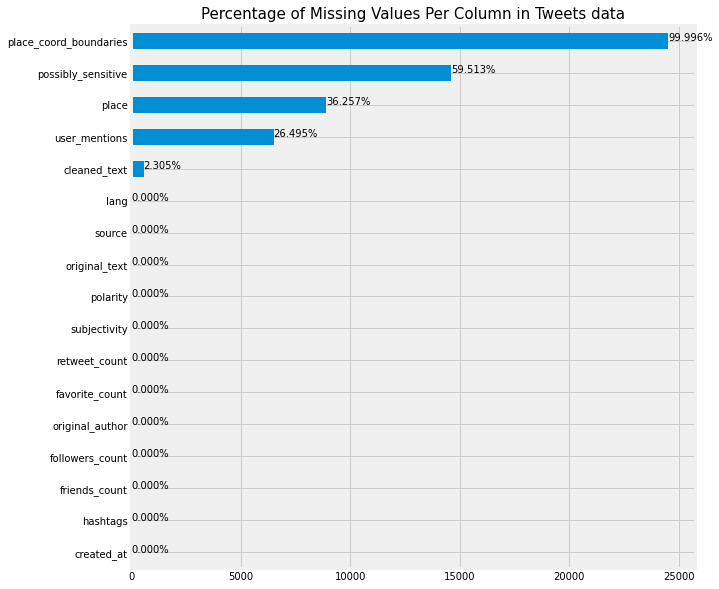

In [7]:
# Check the percentage of missing values in every column
ax = df_tweet.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df_tweet.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

**Most frequent words in our tweets dataset**

In [8]:
english_word=df_tweet[['cleaned_text']][df_tweet['lang']=='en']

In [9]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in english_word.cleaned_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

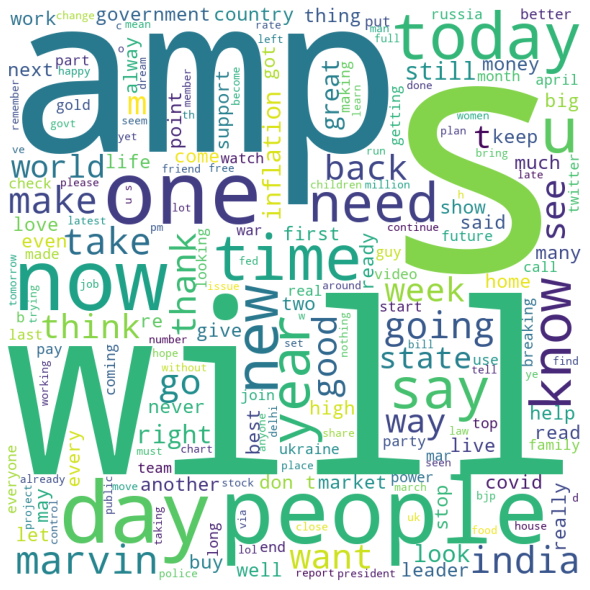

In [10]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()